In [201]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), "src"))

In [ ]:
import wntr
from waterpipes import plotting
from waterpipes import experiment

ModuleNotFoundError: No module named 'src'

In [203]:
inp_file = 'medium_net.inp'

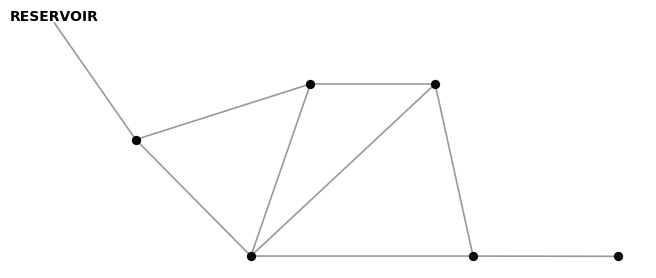

In [204]:
base_wn = wntr.network.WaterNetworkModel(inp_file)
plotting.plot_network(base_wn, node_size=18)

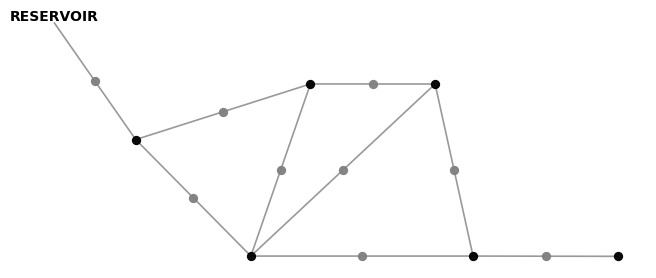

In [205]:
import copy
wn = copy.deepcopy(base_wn)
for i, pn in enumerate(base_wn.pipe_name_list):
    wn = wntr.morph.split_pipe(wn, pn, pn + '_B', f'LEAK-{i}')
    
plotting.plot_network(wn, node_size=18)

In [206]:
results = experiment.run_epanet(base_wn, N_list=[5], split_ratios=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

N = 5, demand-junction-IDs=['2', '3', '6'], time=43.81906795501709


In [218]:
results_new, df = experiment.run_PINN(base_wn, results, scenario_params=['split ratios'], print_interval=50, n_samples=50, layer_sizes=3*[250], threshold=0.8)

N = 5, t=17.022505044937134010504988810514


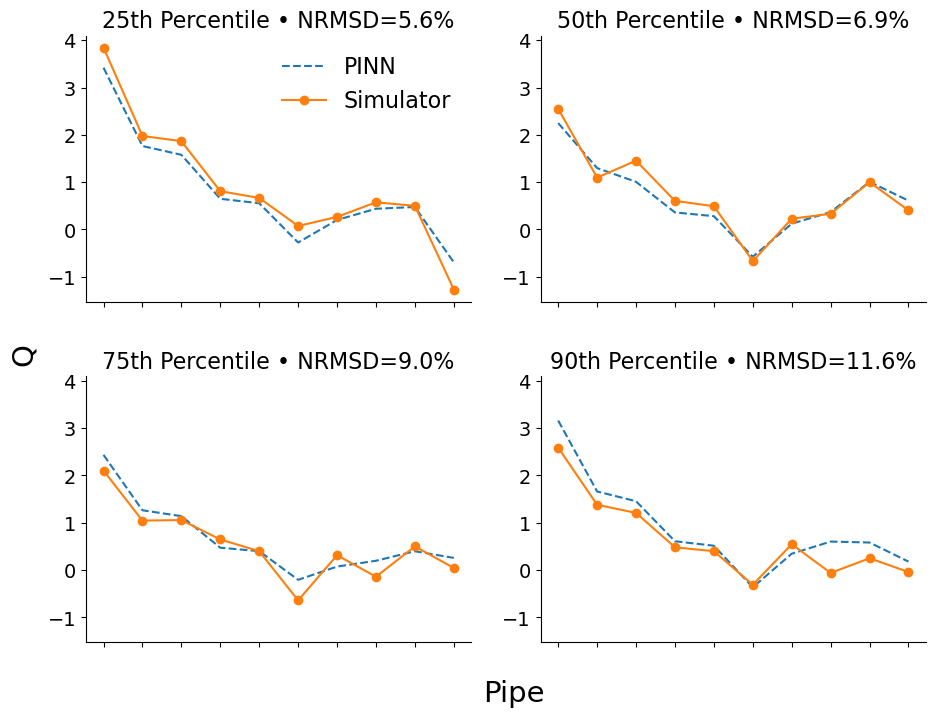

In [216]:
plotting.plot_percentiles(results[-1].Q_pred, results_new[-1].Q_true, percentiles=(25, 50, 75, 90))

In [217]:
from IPython.display import display
display(df)

,N,# demand junctions,epanet time (s),PINN time,mean NRMSD
0,5.0,3.0,43.819068,47.527156,0.077258
